# 26-Pizza Plot comparisions Plots

## Radar Plots to show stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np


from PIL import Image
import urllib
import json
import os
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager

##  Data Preprocessing

- Read Attacking Stats

In [48]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/shot.csv")



#Create new columns
liga["npG"] = liga["Gls"] -liga["PK"]
del liga["Gls"] 
del liga["PK"]

# Create main dataframe
list1 = liga.iloc[:,1]
df1 = pd.DataFrame()
df1["Player"] =list1

# applying merge with more parameters
df1 = df1.merge(liga[['Player','Pos','Squad','90s','npxG','npG','Sh/90']], on = 'Player', how = 'left')

In [49]:
df1.head()

,Player,Pos,Squad,90s,npxG,npG,Sh/90
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.5,1,1.29
1,Che Adams,FW,Southampton,8.9,2.3,3,2.12
2,Tyler Adams,MF,Leeds United,10.0,0.0,0,0.20
3,Tosin Adarabioyo,DF,Fulham,9.0,0.1,1,0.22
4,Rayan Aït Nouri,DF,Wolves,7.2,0.3,0,0.83


In [50]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/GCA.csv")

liga["GSCA"] = liga["GCA"] + liga["SCA"]
del liga["GCA"]
del liga["SCA"]

# applying merge with more parameters
df1 = df1.merge(liga[['GSCA','Player']], on = 'Player', how = 'left')

In [51]:
df1.head()

,Player,Pos,Squad,90s,npxG,npG,Sh/90,GSCA
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.5,1,1.29,27.0
1,Che Adams,FW,Southampton,8.9,2.3,3,2.12,19.0
2,Tyler Adams,MF,Leeds United,10.0,0.0,0,0.20,15.0
3,Tosin Adarabioyo,DF,Fulham,9.0,0.1,1,0.22,3.0
4,Rayan Aït Nouri,DF,Wolves,7.2,0.3,0,0.83,13.0


- Read Passing Stats

In [52]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/pass.csv")


# applying merge with more parameters
df1 = df1.merge(liga[['Player', 'xA','Prog','Cmp']], on = 'Player', how = 'left')

In [53]:
df1.head()

,Player,Pos,Squad,90s,npxG,npG,Sh/90,GSCA,xA,Prog,Cmp
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.5,1,1.29,27.0,0.9,14.0,196.0
1,Che Adams,FW,Southampton,8.9,2.3,3,2.12,19.0,1.6,8.0,133.0
2,Tyler Adams,MF,Leeds United,10.0,0.0,0,0.20,15.0,0.5,43.0,423.0
3,Tosin Adarabioyo,DF,Fulham,9.0,0.1,1,0.22,3.0,0.1,24.0,342.0
4,Rayan Aït Nouri,DF,Wolves,7.2,0.3,0,0.83,13.0,0.9,36.0,308.0


- Possesion

In [54]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/poss.csv")
# applying merge with more parameters
df1 = df1.merge(liga[['Succ%', 'PCarries','Player']], on = 'Player', how = 'left')

In [55]:
df1.head()

,Player,Pos,Squad,90s,npxG,npG,Sh/90,GSCA,xA,Prog,Cmp,Succ%,PCarries
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.5,1,1.29,27.0,0.9,14.0,196.0,53.8,35.0
1,Che Adams,FW,Southampton,8.9,2.3,3,2.12,19.0,1.6,8.0,133.0,83.3,13.0
2,Tyler Adams,MF,Leeds United,10.0,0.0,0,0.20,15.0,0.5,43.0,423.0,75.0,36.0
3,Tosin Adarabioyo,DF,Fulham,9.0,0.1,1,0.22,3.0,0.1,24.0,342.0,100.0,23.0
4,Rayan Aït Nouri,DF,Wolves,7.2,0.3,0,0.83,13.0,0.9,36.0,308.0,55.6,50.0


- Defending`

In [56]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/def.csv")

# applying merge with more parameters
df1 = df1.merge(liga[['TklW','Int','Tkl+Int','%','Blocks','Clr','Player']], on = 'Player', how = 'left')

In [57]:
df1.head()

,Player,Pos,Squad,90s,npxG,npG,Sh/90,GSCA,xA,Prog,Cmp,Succ%,PCarries,TklW,Int,Tkl+Int,%,Blocks,Clr
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.5,1,1.29,27.0,0.9,14.0,196.0,53.8,35.0,10,1,14.0,32.4,13.0,1.0
1,Che Adams,FW,Southampton,8.9,2.3,3,2.12,19.0,1.6,8.0,133.0,83.3,13.0,5,2,10.0,28.3,6.0,14.0
2,Tyler Adams,MF,Leeds United,10.0,0.0,0,0.20,15.0,0.5,43.0,423.0,75.0,36.0,19,10,43.0,34.4,22.0,8.0
3,Tosin Adarabioyo,DF,Fulham,9.0,0.1,1,0.22,3.0,0.1,24.0,342.0,100.0,23.0,7,16,26.0,26.5,10.0,55.0
4,Rayan Aït Nouri,DF,Wolves,7.2,0.3,0,0.83,13.0,0.9,36.0,308.0,55.6,50.0,8,10,26.0,32.4,10.0,13.0


In [58]:
df1 = df1.iloc[:,[0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,4,5]]

In [59]:
df1

,Player,Pos,Squad,90s,Sh/90,GSCA,xA,Prog,Cmp,Succ%,PCarries,TklW,Int,Tkl+Int,%,Blocks,Clr,npxG,npG
0,Brenden Aaronson,MFFW,Leeds United,9.3,1.29,27.0,0.9,14.0,196.0,53.8,35.0,10,1,14.0,32.4,13.0,1.0,1.5,1
1,Che Adams,FW,Southampton,8.9,2.12,19.0,1.6,8.0,133.0,83.3,13.0,5,2,10.0,28.3,6.0,14.0,2.3,3
2,Tyler Adams,MF,Leeds United,10.0,0.20,15.0,0.5,43.0,423.0,75.0,36.0,19,10,43.0,34.4,22.0,8.0,0.0,0
3,Tosin Adarabioyo,DF,Fulham,9.0,0.22,3.0,0.1,24.0,342.0,100.0,23.0,7,16,26.0,26.5,10.0,55.0,0.1,1
4,Rayan Aït Nouri,DF,Wolves,7.2,0.83,13.0,0.9,36.0,308.0,55.6,50.0,8,10,26.0,32.4,10.0,13.0,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Wilfried Zaha,FW,Crystal Palace,8.7,2.86,31.0,1.4,18.0,186.0,48.7,60.0,11,4,22.0,30.6,5.0,3.0,2.6,5
820,Jordan Zemura,DF,Bournemouth,6.4,0.00,16.0,0.7,18.0,170.0,55.6,32.0,7,13,28.0,26.0,16.0,11.0,0.0,0
821,Oleksandr Zinchenko,DF,Arsenal,4.4,0.92,8.0,0.3,26.0,262.0,75.0,34.0,3,10,16.0,31.4,4.0,5.0,0.1,0
822,Hakim Ziyech,MF,Chelsea,1.4,2.21,5.0,0.1,2.0,43.0,33.3,4.0,1,1,5.0,18.8,1.0,1.0,0.1,0


### Prepping pizza plot

In [60]:
df1 = df1.loc[ (df1['Pos'] =="MF" ) & (df1['90s'] > 3) ]

In [61]:
df1 =df1.reset_index()

In [62]:
x = input("Enter Player Name: ")
player = df1.loc[df1['Player']== x].reset_index()
player = list(player.loc[0])


Enter Player Name:  Thomas Partey


In [93]:
## Finding Percentile values
def find(txt):
    lis = []
    j = df1.index[df1['Player'] == txt ].tolist()
    j = j[0]
    for k in range(5,20):
        lis.append(stats.percentileofscore(df1.iloc[:,k],df1.iloc[j,k], kind='rank'))
    return lis
per =find(x)
per = list(map(lambda x: round(x),per  ))

In [95]:
per1= find("Granit Xhaka")
per1 = list(map(lambda x: round(x),per1  ))

#### Rename Column names

In [92]:
#Create a parameter list
params = list(df1.columns)
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[5:]
params[5] = "% Succ\nDribbles"
params[3] = "Prog\nPasses"
params[4] = "Passes\nCompleted"
params[10] = "% Succ\nPresses"
params[6] = "Prog\nCarries"
params[1] = "Goal,Shot\nCreating Actions"
params[12] = "Clearances"

Text(0.99, 0.005, 'Players only with more than 5 90s\ndata: statsbomb via fbref\ninspo : @mckayjohns')

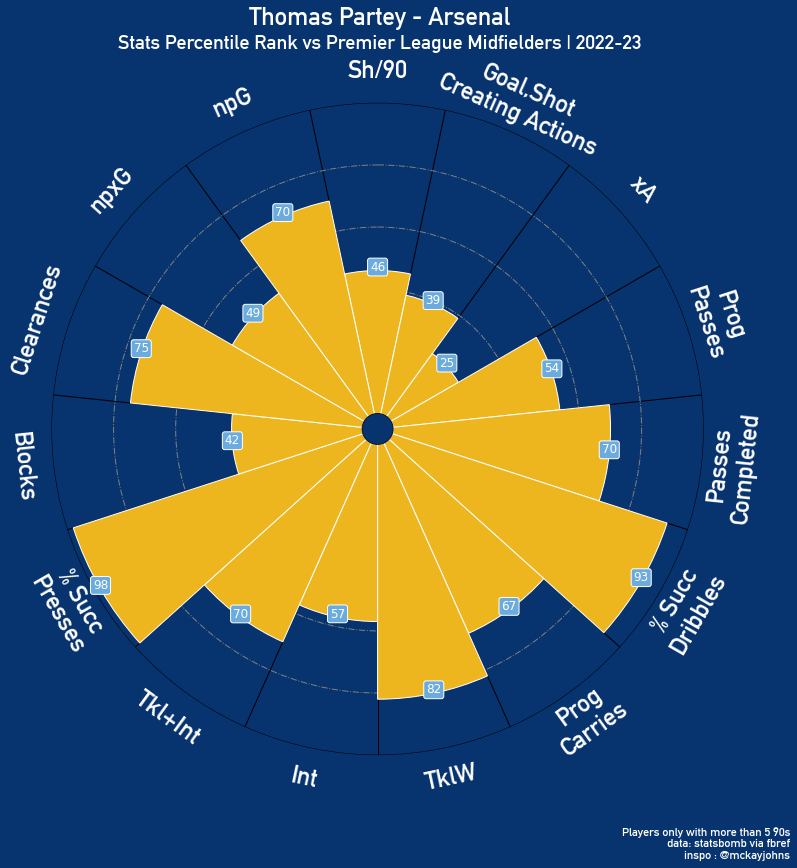

In [91]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
# plot pizza
fig, ax = baker.make_pizza(
    per,              # list of values
    figsize=(12, 12),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#EDB61F", edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        font = "DIN Alternate",size =25,color="white",fontweight="bold",
        va="center", alpha=1
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)


fig.set_facecolor('#07336F')
ax.patch.set_facecolor('#07336F')

# add title
fig.text(
    0.515, 0.97, "Thomas Partey - Arsenal",
    ha="center", font = "DIN Alternate",size =25,color="white",fontweight="bold"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Stats Percentile Rank vs Premier League Midfielders | 2022-23",
    ha="center", font = "DIN Alternate",size =20,color="white",fontweight="bold"
)

# add credits
notes = 'Players only with more than 5 90s'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "inspo : @mckayjohns"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}",
    font = "DIN Alternate",size =12,color="white",fontweight="bold",
    ha="right"
)



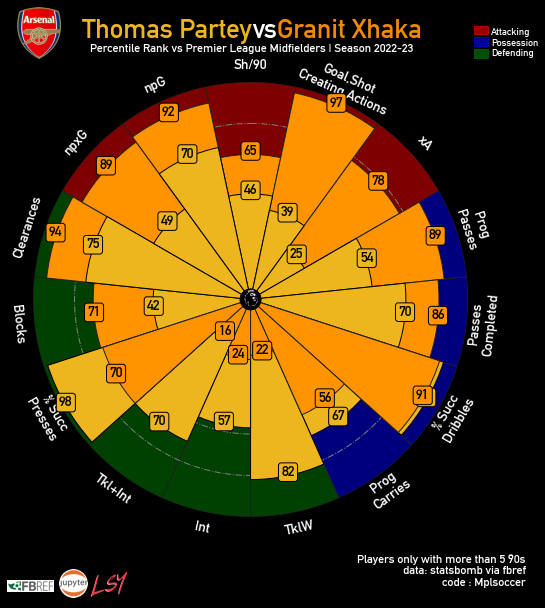

In [175]:
import matplotlib.image as image
# color for the slices and text
text_colors = ["red"] * 3 + ["blue"] * 4 + ["green"] * 6 + ["red"] * 2
slice_colors = ["black"] * 15 

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)



# plot pizza
fig, ax = baker.make_pizza(
    per,                     # list of values
    compare_values=per1,color_blank_space=text_colors,
    # comparison values
    figsize=(8, 8), 
         # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_slices=dict(
        edgecolor="black", zorder=2, linewidth=1,facecolor="#EDB61F"
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        font = "DIN Alternate",size =14,color="white",fontweight="bold", va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        font = "DIN Alternate",size =14,color="black",fontweight="bold", zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#EDB61F",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        font = "DIN Alternate",size =14,color="black",fontweight="bold", zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)



fig.set_facecolor('black')
ax.patch.set_facecolor('black')


# add title
fig_text(
    0.515, 0.99, "<Thomas Partey><vs><Granit Xhaka>", fig=fig,
    highlight_textprops=[{"color": '#EDB61F'}, {"color": 'white'}, {"color": '#EE8900'}],
    ha="center", font = "DIN Alternate", size=27
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Percentile Rank vs Premier League Midfielders | Season 2022-23",
    font = "DIN Alternate",size =12,color="white",fontweight="bold",
    ha="center"
)

# add credits
notes = 'Players only with more than 5 90s'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "code : Mplsoccer"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}",
    font = "DIN Alternate",size =12,color="white",fontweight="bold",
    ha="right"
)

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/PREM.png')
ax_image = add_image(
    im1, fig, left=0.4918, bottom=0.4603, width=0.043, height=0.09
)   # these values might differ when you are plotting



# add image
im2 = plt.imread('/Users/ligandrosy/Downloads/FB.png')
ax_image = add_image(
    im2, fig, left=0.09, bottom=-0.04, width=0.08, height=0.09
)   # these values might differ when you are plotting
# add image
im3 = plt.imread('/Users/ligandrosy/Downloads/JP.png')
ax_image = add_image(
    im3, fig, left=0.18, bottom=-0.015, width=0.05, height=0.05
)   # these values might differ when you are plotting
# add image
im4 = plt.imread('/Users/ligandrosy/Downloads/LSY.png')
ax_image = add_image(
    im4, fig, left=0.2, bottom=-0.055, width=0.13, height=0.13
)   # these values might differ when you are plotting


# add image
team_id = 9825
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
im5 = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
ax_image = add_image(
    im5, fig, left=0.1, bottom=0.92, width=0.09, height=0.09
)   # these values might differ when you are plotting


# add text
fig.text(
    0.93, 0.925, "Attacking\nPossession\nDefending", size=14,
    font = "DIN Alternate", color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.9, 0.9625), 0.025, 0.015, fill=True, color="red",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.9, 0.9425), 0.025, 0.015, fill=True, color="blue",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.9, 0.9225), 0.025, 0.015, fill=True, color="green",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
])


plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')


plt.show()

### Comparision with Rice

In [178]:
per2= find("Declan Rice")
per2 = list(map(lambda x: round(x),per2  ))

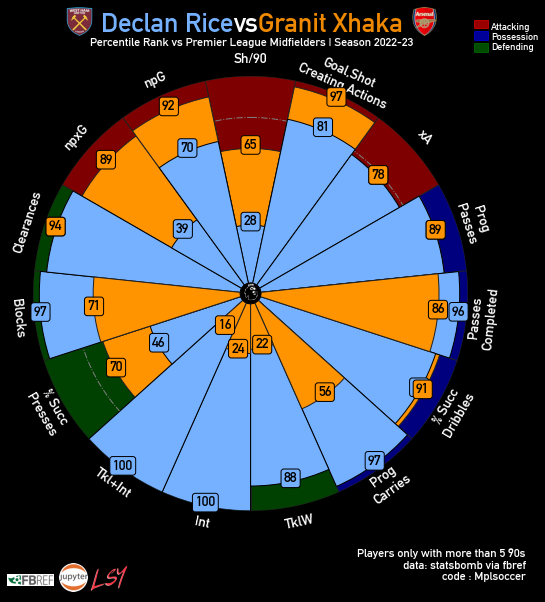

In [195]:
import matplotlib.image as image
# color for the slices and text
text_colors = ["red"] * 3 + ["blue"] * 4 + ["green"] * 6 + ["red"] * 2
slice_colors = ["black"] * 15 

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)



# plot pizza
fig, ax = baker.make_pizza(
    per2,                     # list of values
    compare_values=per1,color_blank_space=text_colors,
    # comparison values
    figsize=(8, 8), 
         # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_slices=dict(
        edgecolor="black", zorder=2, linewidth=1,facecolor="#75B1FF"
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        font = "DIN Alternate",size =14,color="white",fontweight="bold", va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        font = "DIN Alternate",size =14,color="black",fontweight="bold", zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#75B1FF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        font = "DIN Alternate",size =14,color="black",fontweight="bold", zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)



fig.set_facecolor('black')
ax.patch.set_facecolor('black')


# add title
fig_text(
    0.515, 0.99, "<Declan Rice><vs><Granit Xhaka>", fig=fig,
    highlight_textprops=[{"color": '#75B1FF'}, {"color": 'white'}, {"color": '#EE8900'}],
    ha="center", font = "DIN Alternate", size=27
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Percentile Rank vs Premier League Midfielders | Season 2022-23",
    font = "DIN Alternate",size =12,color="white",fontweight="bold",
    ha="center"
)

# add credits
notes = 'Players only with more than 5 90s'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "code : Mplsoccer"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}",
    font = "DIN Alternate",size =12,color="white",fontweight="bold",
    ha="right"
)

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/PREM.png')
ax_image = add_image(
    im1, fig, left=0.4918, bottom=0.4603, width=0.043, height=0.09
)   # these values might differ when you are plotting



# add image
im2 = plt.imread('/Users/ligandrosy/Downloads/FB.png')
ax_image = add_image(
    im2, fig, left=0.09, bottom=-0.04, width=0.08, height=0.09
)   # these values might differ when you are plotting
# add image
im3 = plt.imread('/Users/ligandrosy/Downloads/JP.png')
ax_image = add_image(
    im3, fig, left=0.18, bottom=-0.015, width=0.05, height=0.05
)   # these values might differ when you are plotting
# add image
im4 = plt.imread('/Users/ligandrosy/Downloads/LSY.png')
ax_image = add_image(
    im4, fig, left=0.2, bottom=-0.055, width=0.13, height=0.13
)   # these values might differ when you are plotting


# add image
team_id = 9825
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
im5 = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
ax_image = add_image(
    im5, fig, left=0.79, bottom=0.95, width=0.05, height=0.05
)   # these values might differ when you are plotting
team_id = 8654
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
im5 = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
ax_image = add_image(
    im5, fig, left=0.19, bottom=0.95, width=0.05, height=0.05
)   # these values might differ when you are plotting


# add text
fig.text(
    0.93, 0.925, "Attacking\nPossession\nDefending", size=14,
    font = "DIN Alternate", color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.9, 0.9625), 0.025, 0.015, fill=True, color="red",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.9, 0.9425), 0.025, 0.015, fill=True, color="blue",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.9, 0.9225), 0.025, 0.015, fill=True, color="green",alpha=0.6,
        transform=fig.transFigure, figure=fig
    ),
])
plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')

